In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Dropout
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bank-customer-churn-modeling/Churn_Modelling.csv


In [2]:
df = pd.read_csv('/kaggle/input/bank-customer-churn-modeling/Churn_Modelling.csv')
print(df.shape)

(10000, 14)


In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [6]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [7]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [8]:
df['HasCrCard'].value_counts()

HasCrCard
1    7055
0    2945
Name: count, dtype: int64

In [9]:
df['IsActiveMember'].value_counts()

IsActiveMember
1    5151
0    4849
Name: count, dtype: int64

In [10]:
df['NumOfProducts'].value_counts()

NumOfProducts
1    5084
2    4590
3     266
4      60
Name: count, dtype: int64

In [11]:
df = pd.get_dummies(data=df,columns=['Geography','Gender'],drop_first=True)

In [12]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [13]:
cols_to_scale = ['CreditScore','Balance','EstimatedSalary']

scaler = MinMaxScaler()

df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

In [14]:
df[cols_to_scale] = df[cols_to_scale].round(2)

In [15]:
df['Geography_Germany'] = df['Geography_Germany'].map({False:0,True:1})
df['Geography_Spain'] = df['Geography_Spain'].map({False:0,True:1})
df['Gender_Male'] = df['Gender_Male'].map({False:0,True:1})

In [16]:
X = df.drop('Exited',axis=1)
y = df['Exited']

In [17]:
smote = SMOTE(sampling_strategy='auto')

X_resample,y_resample = smote.fit_resample(X,y)

In [18]:
y_resample.value_counts()

Exited
1    7963
0    7963
Name: count, dtype: int64

In [19]:
X_train,X_test,y_train,y_test = train_test_split(X_resample,y_resample,test_size=0.2,random_state=1)

In [20]:
print(X_train.shape, y_test.shape)

(12740, 11) (3186,)


In [21]:
model = Sequential()

model.add(Dense(16,activation='relu',input_dim=11))
model.add(Dropout(0.1))

model.add(Dense(16,activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(1,activation='sigmoid'))

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                192       
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 481
Trainable params: 481
Non-trainable params: 0
_________________________________________________________________


In [23]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [24]:
history = model.fit(X_train,y_train,batch_size=32,epochs=200,validation_split=0.2)

Epoch 1/200
319/319 [==============================] - 2s 3ms/step - loss: 0.9926 - accuracy: 0.5789 - val_loss: 0.6114 - val_accuracy: 0.6954
Epoch 2/200
319/319 [==============================] - 1s 2ms/step - loss: 0.6364 - accuracy: 0.6515 - val_loss: 0.5752 - val_accuracy: 0.7053
Epoch 3/200
319/319 [==============================] - 1s 2ms/step - loss: 0.5908 - accuracy: 0.6886 - val_loss: 0.5661 - val_accuracy: 0.7104
Epoch 4/200
319/319 [==============================] - 1s 2ms/step - loss: 0.5684 - accuracy: 0.7109 - val_loss: 0.5677 - val_accuracy: 0.7068
Epoch 5/200
319/319 [==============================] - 1s 2ms/step - loss: 0.5623 - accuracy: 0.7154 - val_loss: 0.5626 - val_accuracy: 0.7108
Epoch 6/200
319/319 [==============================] - 1s 2ms/step - loss: 0.5574 - accuracy: 0.7178 - val_loss: 0.5604 - val_accuracy: 0.7123
Epoch 7/200
319/319 [==============================] - 1s 2ms/step - loss: 0.5511 - accuracy: 0.7214 - val_loss: 0.5598 - val_accuracy: 0.7131

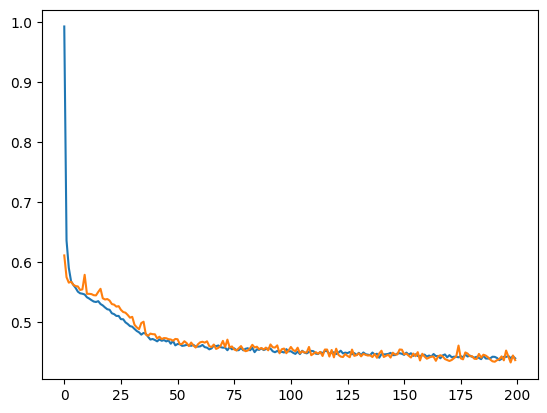

In [25]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

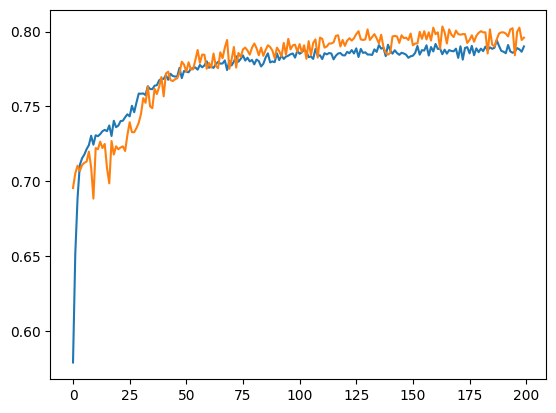

In [26]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()

In [27]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)

100/100 [==============================] - 0s 1ms/step


In [28]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.83      0.81      1534
           1       0.83      0.79      0.81      1652

    accuracy                           0.81      3186
   macro avg       0.81      0.81      0.81      3186
weighted avg       0.81      0.81      0.81      3186



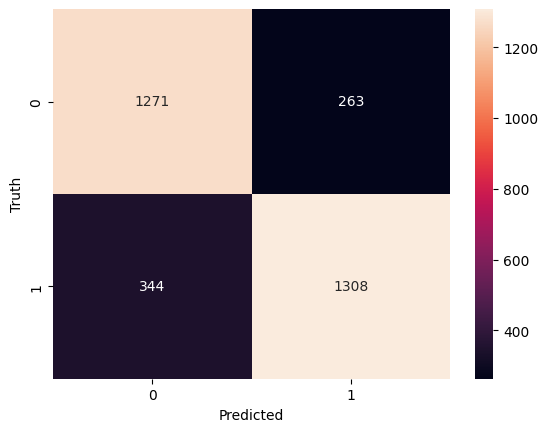

In [29]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()